# Image Arithmetic and Logic Operation

__Read colour hand written image__

__Convert it into grayscale image__

__Perform the following using image Arithmetic Operation__

###### Import required Libraries

In [1]:
import numpy as np

import cv2

import matplotlib.pyplot as plt
%matplotlib inline

###### Original Image

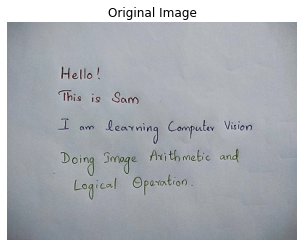

In [2]:
image = cv2.imread("image.jpg")

plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [3]:
print("The Original-image shape =", image.shape, "\nThe Original-image size =", image.size)

The Original-image shape = (300, 400, 3) 
The Original-image size = 360000


In [4]:
image[0]

array([[125, 131, 138],
       [125, 131, 138],
       [122, 130, 137],
       ...,
       [139, 145, 152],
       [138, 144, 151],
       [138, 144, 151]], dtype=uint8)

###### Convert to gray-scale image

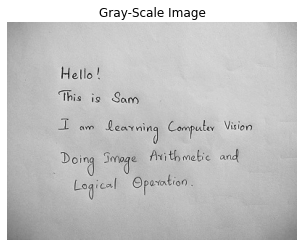

In [5]:
gray_image = cv2.imread("image.jpg", 0)

plt.imshow(gray_image, cmap='gray')
plt.title("Gray-Scale Image")
plt.axis('off')
plt.show()

In [6]:
print("The gray-image shape =", gray_image.shape, 
      "\nThe gray-image size =", gray_image.size, 
      "\nThe gray-image data-type=", gray_image.dtype)

The gray-image shape = (300, 400) 
The gray-image size = 120000 
The gray-image data-type= uint8


In [7]:
gray_image

array([[132, 132, 131, ..., 146, 145, 145],
       [132, 132, 131, ..., 144, 144, 146],
       [130, 130, 131, ..., 145, 147, 152],
       ...,
       [106, 107, 106, ..., 113, 113, 113],
       [105, 106, 105, ..., 112, 113, 110],
       [100, 102, 102, ..., 110, 113, 107]], dtype=uint8)

## a) Brightness Modification

In [8]:
def brightness(input_image, value):
    
    new_image = np.zeros(input_image.shape, input_image.dtype)
    
    for y in range(input_image.shape[0]):
        for x in range(input_image.shape[1]):
            new_image[y,x] = np.clip(input_image[y,x] + value, 0, 255)

  
    fig = plt.figure(figsize=(10, 7))
    plt.suptitle("Brightness Modification")
    
    fig.add_subplot(1, 2, 1)
    plt.title("Input Image")
    plt.imshow(input_image, cmap='gray')
    plt.axis('off')

    fig.add_subplot(1, 2, 2)
    plt.title("Output Image")
    plt.imshow(new_image, cmap='gray')
    plt.axis('off')
    
    plt.show()

### (i) Increasing the Brightness of an Image

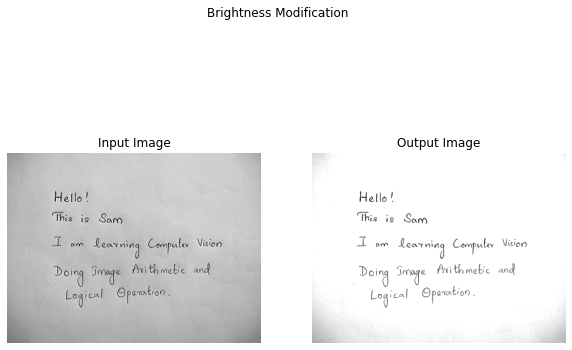

In [9]:
brightness(gray_image, 100)

### (ii) Decreasing the Brightness of an Image

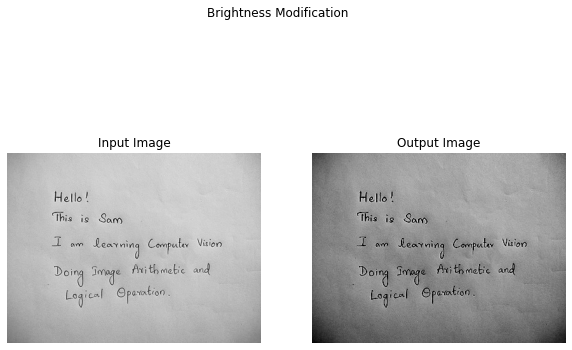

In [10]:
brightness(gray_image, -100)

## b) Contrast Adjustment

In [11]:
def contrast(input_image, value, operator):
    
    new_image = np.zeros(input_image.shape, input_image.dtype)
    
    if operator == "*":
        for y in range(input_image.shape[0]):
            for x in range(input_image.shape[1]):
                new_image[y,x] = np.clip(((input_image[y,x]) * value), 0, 255)
                
    if operator == "/":
        for y in range(input_image.shape[0]):
            for x in range(input_image.shape[1]):
                new_image[y,x] = np.clip(((input_image[y,x]) / value), 0, 255)
    
    fig = plt.figure(figsize=(10, 7))
    plt.suptitle("Contrast Modification")
    
    fig.add_subplot(1, 2, 1)
    plt.title("Input Image")
    plt.imshow(input_image, cmap='gray')
    plt.axis('off')

    fig.add_subplot(1, 2, 2)
    plt.title("Output Image")
    plt.imshow(new_image, cmap='gray')
    plt.axis('off')
    
    plt.show()

### i) Increase in contrast

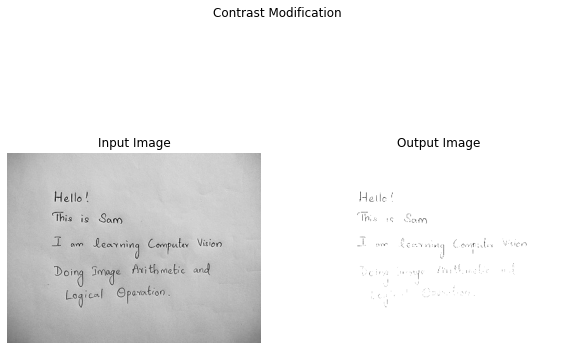

In [12]:
contrast(gray_image, 5, "*")

### ii) Decrease in contrast

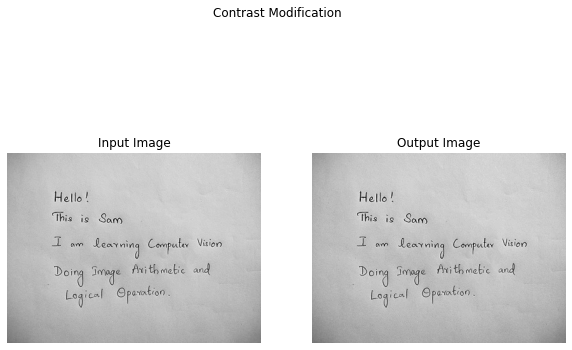

In [13]:
contrast(gray_image, 5, "/")

## c) Image Averaging

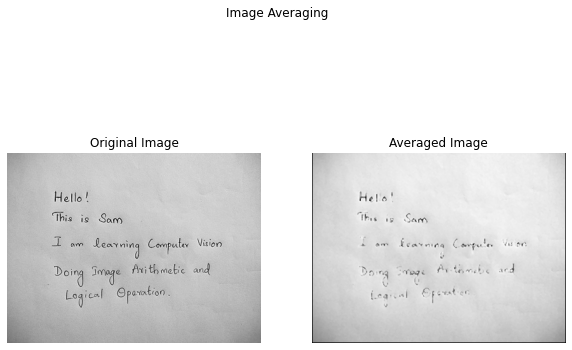

In [14]:
m, n = gray_image.shape

avg_img = np.zeros([m, n])

for i in range(1, m-1):
    for j in range(1, n-1):
        temp = [ gray_image[i-1, j-1], gray_image[i-1, j], gray_image[i-1, j + 1], 
                gray_image[i, j-1], gray_image[i, j], gray_image[i, j + 1], 
                gray_image[i + 1, j-1], gray_image[i + 1, j], gray_image[i + 1, j + 1]]

        temp = sorted(temp)
        avg_img[i, j]= temp[4]

avg_img = avg_img.astype(np.uint8)

fig = plt.figure(figsize=(10, 7))
plt.suptitle("Image Averaging")

fig.add_subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.title("Averaged Image")
plt.imshow(avg_img, cmap='gray')
plt.axis('off')

plt.show()

## d) Select a sub image in an image

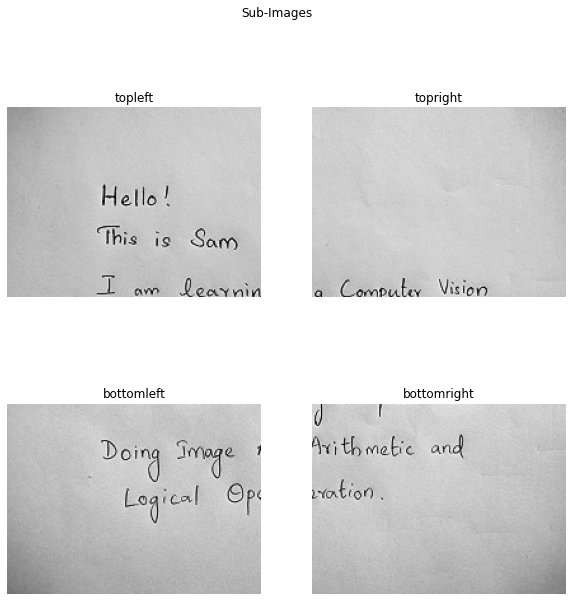

In [15]:
(height, width) = gray_image.shape

centerX, centerY = (width // 2), (height // 2)

topleft = gray_image[0:centerY, 0:centerX]
topright = gray_image[0:centerY, centerX:width]
bottomleft = gray_image[centerY:height, 0:centerX]
bottomright = gray_image[centerY:height, centerX:width]

fig = plt.figure(figsize=(10, 10))
plt.suptitle("Sub-Images")

fig.add_subplot(2, 2, 1)
plt.title("topleft")
plt.imshow(topleft, cmap='gray')
plt.axis('off')

fig.add_subplot(2, 2, 2)
plt.title("topright")
plt.imshow(topright, cmap='gray')
plt.axis('off')

fig.add_subplot(2, 2, 3)
plt.title("bottomleft")
plt.imshow(bottomleft, cmap='gray')
plt.axis('off')

fig.add_subplot(2, 2, 4)
plt.title("bottomright")
plt.imshow(bottomright, cmap='gray')
plt.axis('off')

plt.show()